Challenge: Weather anomalies

plot the temperature anomaly for New York by computing yearly temperature averages for each year and comparing those with a mid-century average in the 1945-1955 decade. 

You can make yearly averages just as we did for the title of the New York Times inspired plot. TMIN plus TMAX over two averaged across the year. 

To make the mid-century average, just sum up results for 1945 through 1955 and then take the difference.



In [7]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [8]:
import getweather

In [9]:
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

In [35]:
# get all historical data for New York, stacked into array

station = 'Vancouver'

allyears = np.arange(1880, 2025)

alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                     for year in allyears])

In [36]:
# compute (TMIN + TMAX)/2, averaged over days in every year
allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)

/var/folders/pd/thkh1t9172x2hyxtjn9543kh0000gn/T/ipykernel_26479/3444122191.py:2: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)


In [37]:
allavg.shape

(145,)

In [38]:
allyears.index(1945)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [39]:
# find the index of values 1945 and 1955 in allyears
list(allyears).index(1945), list(allyears).index(1955)

(65, 75)

In [40]:
midcentury = np.nanmean(allavg[65:75])

In [41]:
midcentury

np.float64(11.709421251806189)

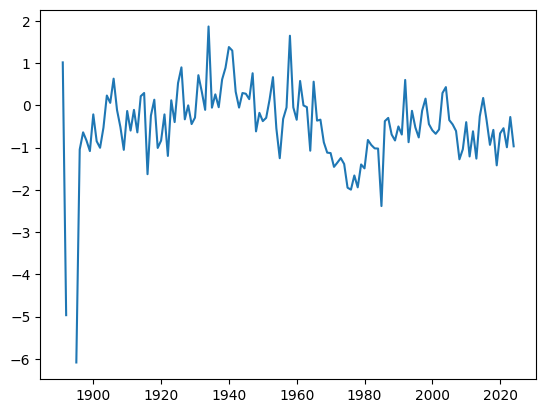

In [42]:
pp.plot(allyears, allavg - midcentury)

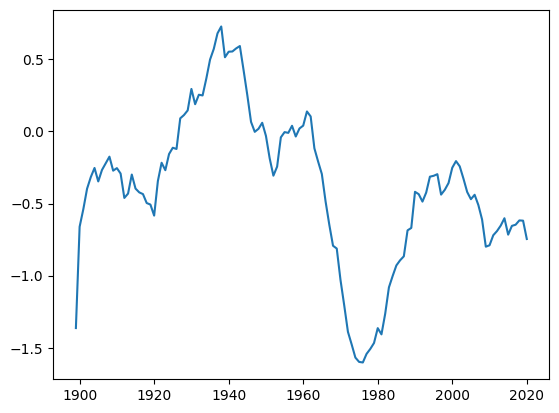

In [43]:
pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'))

In [46]:
# compute and plot the temperature anomaly time series for any station

allyears = np.arange(1880, 2025)

def plotanomaly(station):
    # grab the data
    alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                         for year in allyears])
    
    # make yearly averages, and then the midcentury average
    allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
    midcentury = np.nanmean(allavg[65:75])
    
    # plot with smoothing, adding a label that we can show in a legend
    pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'), label=station)
    
    # set a reasonable range
    pp.axis(ymin=-3,ymax=3)

/var/folders/pd/thkh1t9172x2hyxtjn9543kh0000gn/T/ipykernel_26479/2083998596.py:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
/var/folders/pd/thkh1t9172x2hyxtjn9543kh0000gn/T/ipykernel_26479/2083998596.py:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
/var/folders/pd/thkh1t9172x2hyxtjn9543kh0000gn/T/ipykernel_26479/2083998596.py:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)


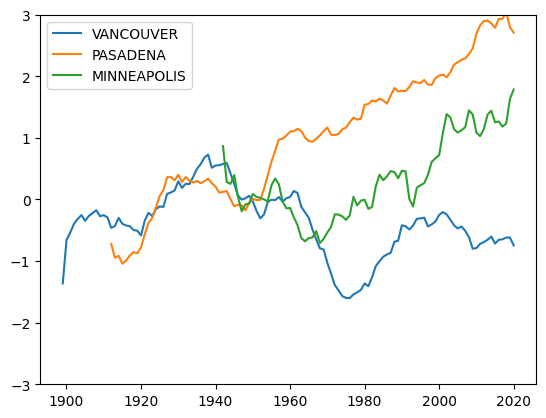

In [52]:
# plotanomaly('NEW YORK')
plotanomaly('VANCOUVER')
# plotanomaly('CLAREMOUNT')
plotanomaly('PASADENA')
plotanomaly('MINNEAPOLIS')

pp.legend()